In [4]:
#importing the libraries to be used for the project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Loading the csv database to used for the project
Brown_eyes = pd.read_csv(r"C:\Users\admin\Downloads\online_retail.csv")

In [6]:
#Examining the database, to check for missing values, data structure, data types etc.
Brown_eyes.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
"""
The aim of the project in part one, is to perform customer purchase behavior analysis, by analyzing the purchasing patterns
of customers andgroup them based on their buying behavior.

We will accomplish this by segmenting customers by frequency of purchases, total spent, or types of products bought.
Then we wil identify repeat customers and their preferences.

For visualizations we will create heatmaps and bar charts to show trends in customer spending habits over time.

To achieve our goal we will implement K-means clustering technique to group customers into categories based on 
their purchasing behavior.
"""

'\nThe aim of the project is to perform customer Purchase Behavior Analysis, by Analyzing the purchasing patterns of customers and\ngroup them based on their buying behavior.\n\nWe will accomplish this by segmenting customers by frequency of purchases, total spent, or types of products bought.\nThen we wil identify repeat customers and their preferences.\n\nFor visualizations we will create heatmaps and bar charts to show trends in customer spending habits over time.\n\nTo achieve our goal we will implement K-means clustering technique to group customers into categories based on \ntheir purchasing behavior.\n'

In [8]:
"""
 After completing part one will perform product popularity and sales trend analysis, this is to identify which products
 are the most popular and track their sales trends over time.

We will do this by calculating the total quantity sold for each product and create a ranking, Then plot a time series 
of the sales for each product with a line charts for sales over the months.

Finally we will examine the results to identify seasonal trends in product sales based on the date checking if there are 
there spikes around any holidays etc.
"""

'\n After completing part one will perform Product Popularity and Sales Trend Analysis, this is identify which products\n are the most popular and track their sales trends over time.\n\nWe will do this by calculating the total quantity sold for each product and create a ranking, Then plot a time series \nof the sales for each product with a line charts for sales over the months.\n\nFinally we will examine the results to identify seasonal trends in product sales based on the date checking if there are \nthere spikes around any holidays etc.\n'

In [9]:
"""
 The final part of the project is to create a Sales Prediction Model, the machine learning model will predict future sales.

by using features like Quantity, UnitPrice, InvoiceDate, and CustomerID to predict future sales trends.

We will train a regression model to predict sales and also use classification to categorize high/low sales days.

We'll evaluate the model using the RMSE.
"""

"\n The final part of the project is to create a Sales Prediction Model, the machine learning model will predict future sales.\n\nby using features like Quantity, UnitPrice, InvoiceDate, and CustomerID to predict future sales trends.\n\nWe will train a regression model to predict sales and also use classification to categorize high/low sales days.\n\nWe'll evaluate the model using the RMSE.\n"

In [11]:
# We begin by cleaning the data  and dropping any rows with missing values in essential columns
Brown_eyes.dropna(subset=['CustomerID', 'Quantity', 'UnitPrice'], inplace=True)

# Remove duplicates if any
Brown_eyes.drop_duplicates(inplace=True)

# Convert 'InvoiceDate' to datetime format
Brown_eyes['InvoiceDate'] = pd.to_datetime(Brown_eyes['InvoiceDate'])

Brown_eyes.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
# We can now calculate the total amount spent for each transaction
Brown_eyes['TotalPurchase'] = Brown_eyes['Quantity'] * Brown_eyes['UnitPrice']

# Extract month and year for trend analysis
Brown_eyes['InvoiceMonth'] = Brown_eyes['InvoiceDate'].dt.to_period('M')

Brown_eyes.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [14]:
# We can now calculate the total spent per customer
customer_spend = Brown_eyes.groupby('CustomerID')['TotalPurchase'].sum().reset_index()

# And also calculate purchase frequency (number of invoices per customer)
customer_freq = Brown_eyes.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

#We also need to calculate the recency (time since last purchase)
recent_purchase = Brown_eyes.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recent_purchase['Recency'] = (Brown_eyes['InvoiceDate'].max() - recent_purchase['InvoiceDate']).dt.days

# We can now merge all customer behavior data into one DataFrame
customer_data = pd.merge(customer_spend, customer_freq, on='CustomerID')
customer_data = pd.merge(customer_data, recent_purchase[['CustomerID', 'Recency']], on='CustomerID')

# Rename the columns for better clarity
customer_data.columns = ['CustomerID', 'TotalSpend', 'PurchaseFrequency', 'Recency']

customer_data.head()


,CustomerID,TotalSpend,PurchaseFrequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


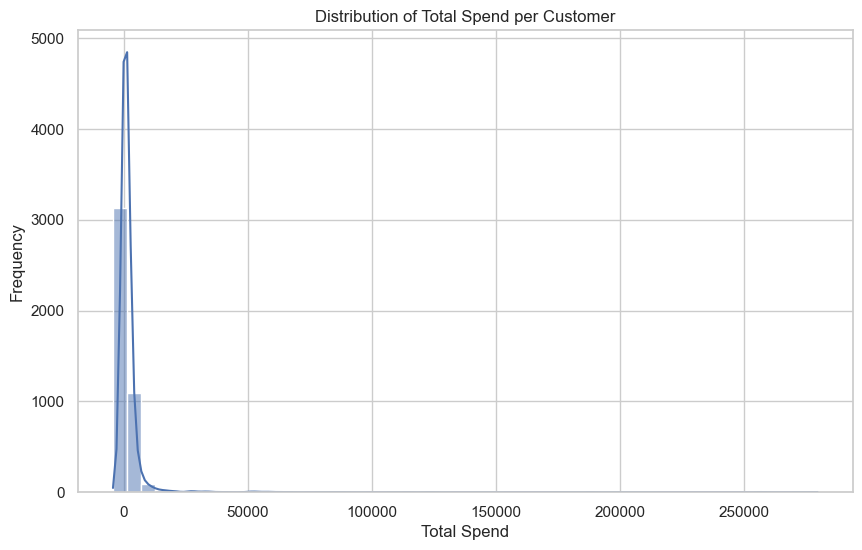

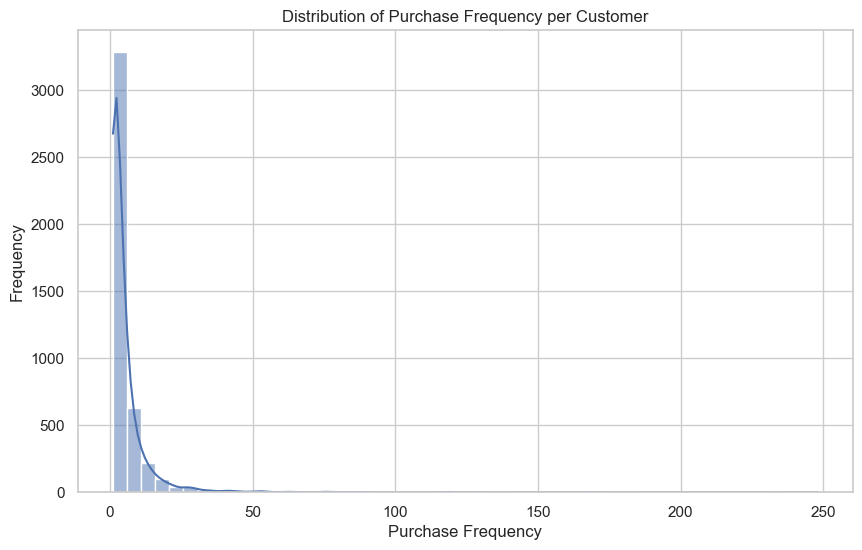

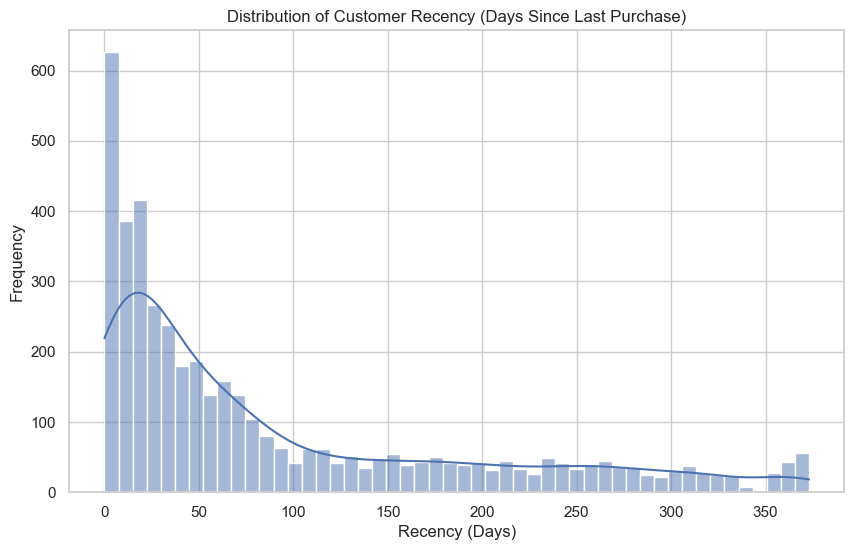

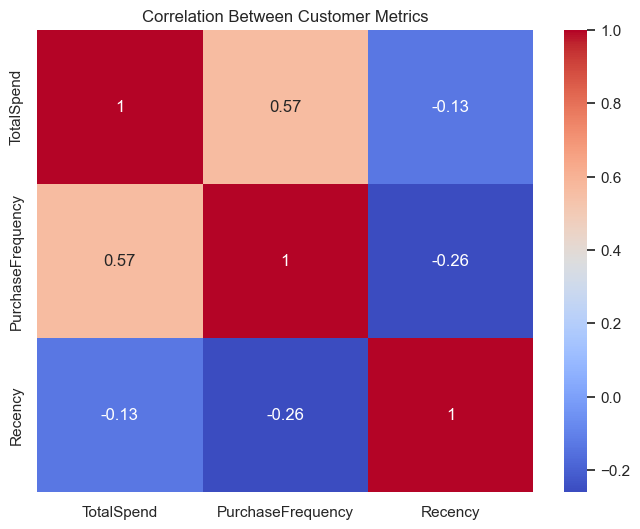

In [15]:
# To display our results, we create a few plots

# Set the style of the plots
sns.set(style="whitegrid")

# Plot Total Spend distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['TotalSpend'], bins=50, kde=True)
plt.title('Distribution of Total Spend per Customer')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

# Plot Purchase Frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['PurchaseFrequency'], bins=50, kde=True)
plt.title('Distribution of Purchase Frequency per Customer')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.show()

# Plot Recency distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Recency'], bins=50, kde=True)
plt.title('Distribution of Customer Recency (Days Since Last Purchase)')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap between the metrics
plt.figure(figsize=(8, 6))
sns.heatmap(customer_data[['TotalSpend', 'PurchaseFrequency', 'Recency']].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Between Customer Metrics')
plt.show()


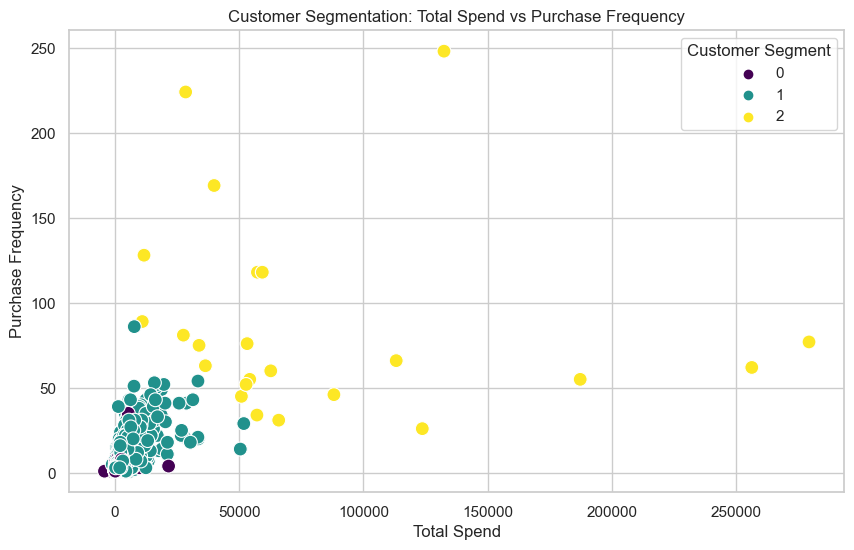

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for clustering)
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data[['TotalSpend', 'PurchaseFrequency', 'Recency']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Segment'] = kmeans.fit_predict(customer_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalSpend', y='PurchaseFrequency', hue='Segment', palette='viridis', s=100)
plt.title('Customer Segmentation: Total Spend vs Purchase Frequency')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.legend(title='Customer Segment')
plt.show()


In [ ]:
"""
Summary of the Workflow:
We loaded and cleaned the data.

Created features that describe customer behavior.

Visualize the distribution of key metrics.

Apply K-means clustering to segment customers.

Visualize the customer segments.

Draw insights for business applications (marketing, retention, etc.).
"""

# Part Two

In [17]:
# Load the data into a DataFrame
forehead = pd.read_csv(r"C:\Users\admin\Downloads\online_retail.csv") 

# Drop any rows with missing values in essential columns
forehead.dropna(subset=['StockCode', 'Quantity', 'UnitPrice'], inplace=True)

# Remove duplicates if any
forehead.drop_duplicates(inplace=True)

# Convert 'InvoiceDate' to datetime format
forehead['InvoiceDate'] = pd.to_datetime(forehead['InvoiceDate'])

forehead.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
# Calculate total quantity sold per product
product_popularity = forehead.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by quantity sold (from highest to lowest)
product_popularity = product_popularity.sort_values(by='Quantity', ascending=False)

# Check the top 10 most popular products
product_popularity.head(10)


,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
1866,JUMBO BAG RED RETROSPOT,47260
2740,POPCORN HOLDER,36322
244,ASSORTED COLOUR BIRD ORNAMENT,36282
2395,PACK OF 72 RETROSPOT CAKE CASES,36016
3918,WHITE HANGING HEART T-LIGHT HOLDER,35298
2803,RABBIT NIGHT LIGHT,30631
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26299
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24719


In [19]:
# Extract the month and year from the 'InvoiceDate' column
forehead['InvoiceMonth'] = forehead['InvoiceDate'].dt.to_period('M')

# Group by product and month to get the total quantity sold per product per month
monthly_sales = forehead.groupby(['InvoiceMonth', 'Description'])['Quantity'].sum().reset_index()

monthly_sales.head()


,InvoiceMonth,Description,Quantity
0,2010-12,4 PURPLE FLOCK DINNER CANDLES,16
1,2010-12,OVAL WALL MIRROR DIAMANTE,22
2,2010-12,SET 2 TEA TOWELS I LOVE LONDON,305
3,2010-12,*Boombox Ipod Classic,1
4,2010-12,*USB Office Mirror Ball,2


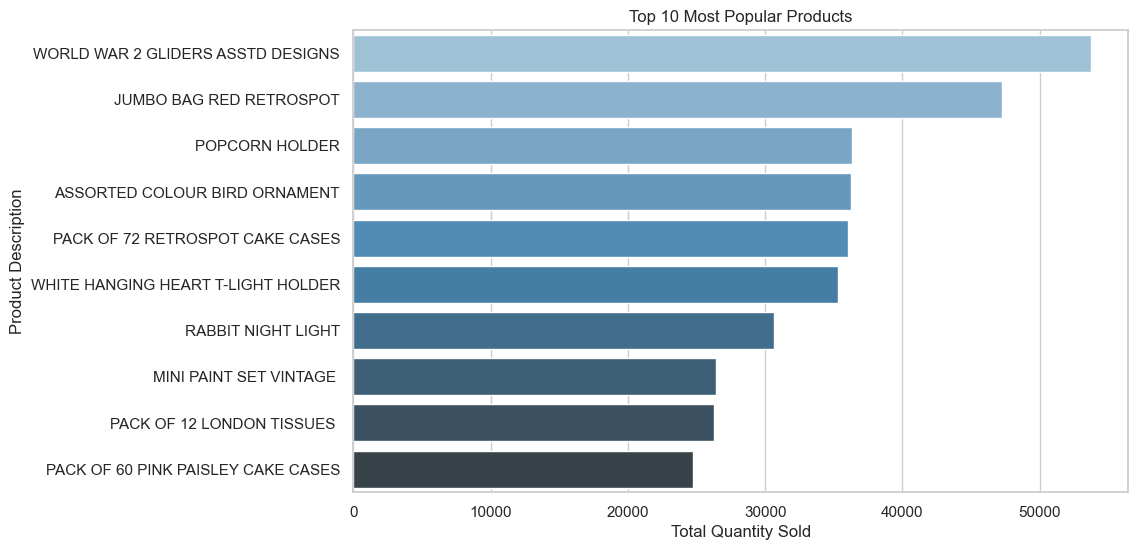

In [20]:
# We now display the findings for part two
# Set the style of the plots
sns.set(style="whitegrid")

# Plot the top 10 most popular products
top_10_products = product_popularity.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products, x='Quantity', y='Description', palette='Blues_d')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_6700\1989307433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_sales['InvoiceMonth'] = product_sales['InvoiceMonth'].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_6700\1989307433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_sales['Quantity'] = pd.to_numeric(product_sales['Quantity'], errors='coerce')
C:\Users\admin\AppData\Local\Temp\ipykernel_6700\1989307433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

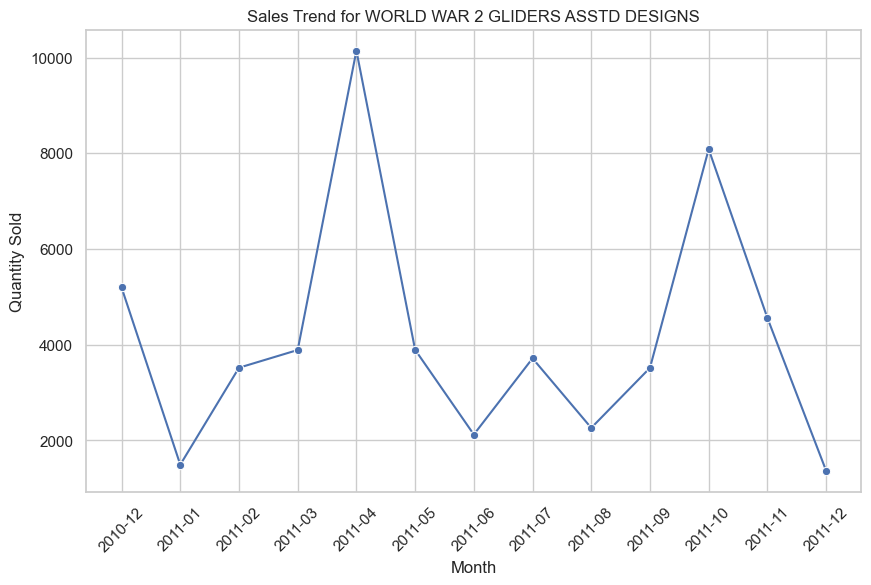

In [27]:
# Convert 'InvoiceMonth' to a string, We had to do this because the InvoiceMonth column is of type Period,
# so we can convert it to a string to make it easier to plot.
product_sales['InvoiceMonth'] = product_sales['InvoiceMonth'].astype(str)

# We also must ensure 'Quantity' is numeric (and handle any non-numeric values)
product_sales['Quantity'] = pd.to_numeric(product_sales['Quantity'], errors='coerce')

# Drop rows where 'Quantity' is NaN (optional)
product_sales.dropna(subset=['Quantity'], inplace=True)

# Plot the sales trend over time for this product
plt.figure(figsize=(10, 6))
sns.lineplot(data=product_sales, x='InvoiceMonth', y='Quantity', marker='o')
plt.title(f'Sales Trend for {product_name}')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


In [29]:
#We perform the same conversion to ensure 'InvoiceMonth' is a string type
multiple_products_sales['InvoiceMonth'] = multiple_products_sales['InvoiceMonth'].astype(str)

# Ensure 'Quantity' is numeric (and handle any non-numeric values)
multiple_products_sales['Quantity'] = pd.to_numeric(multiple_products_sales['Quantity'], errors='coerce')

# Drop rows where 'Quantity' is NaN 
multiple_products_sales.dropna(subset=['Quantity'], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_6700\3716764404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_products_sales['InvoiceMonth'] = multiple_products_sales['InvoiceMonth'].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_6700\3716764404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_products_sales['Quantity'] = pd.to_numeric(multiple_products_sales['Quantity'], errors='coerce')
C:\Users\admin\AppData\Local\Temp\ipykernel_6700\3716764404.py:8: SettingWithCopyWarning

In [30]:
# Check the data types of the columns in 'multiple_products_sales'
print(multiple_products_sales.dtypes)

InvoiceMonth    object
Description     object
Quantity         int64
dtype: object


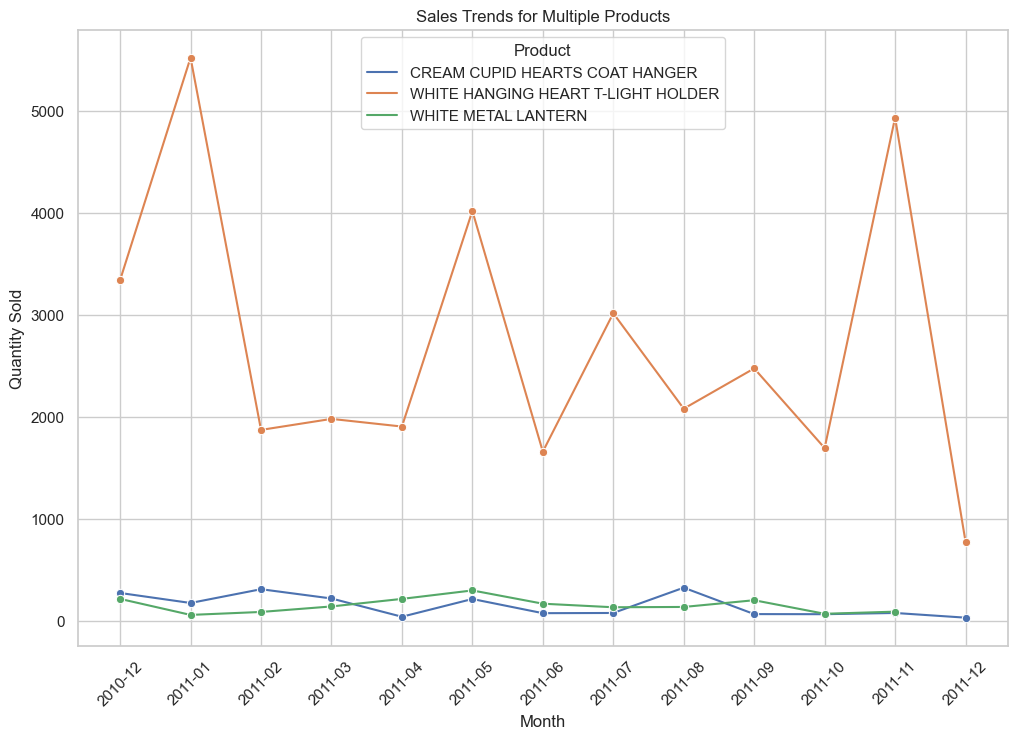

In [31]:
# Plot the sales trends for multiple products
plt.figure(figsize=(12, 8))
sns.lineplot(data=multiple_products_sales, x='InvoiceMonth', y='Quantity', hue='Description', marker='o')
plt.title('Sales Trends for Multiple Products')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.show()

In [32]:
#We already did but for teaching purpose we again must ensure 'InvoiceMonth' is in the correct format
monthly_sales_trend['InvoiceMonth'] = monthly_sales_trend['InvoiceMonth'].astype(str)

# Ensure 'Quantity' is numeric (and handle any non-numeric values)
monthly_sales_trend['Quantity'] = pd.to_numeric(monthly_sales_trend['Quantity'], errors='coerce')

# Drop rows where 'Quantity' is NaN (optional, based on your use case)
monthly_sales_trend.dropna(subset=['Quantity'], inplace=True)

In [33]:
# Check the data types of the columns in 'monthly_sales_trend'
print(monthly_sales_trend.dtypes)

InvoiceMonth    object
Quantity         int64
dtype: object


0    2010-12
1    2011-01
2    2011-02
3    2011-03
4    2011-04
Name: InvoiceMonth, dtype: object
Empty DataFrame
Columns: [InvoiceMonth, Quantity]
Index: []


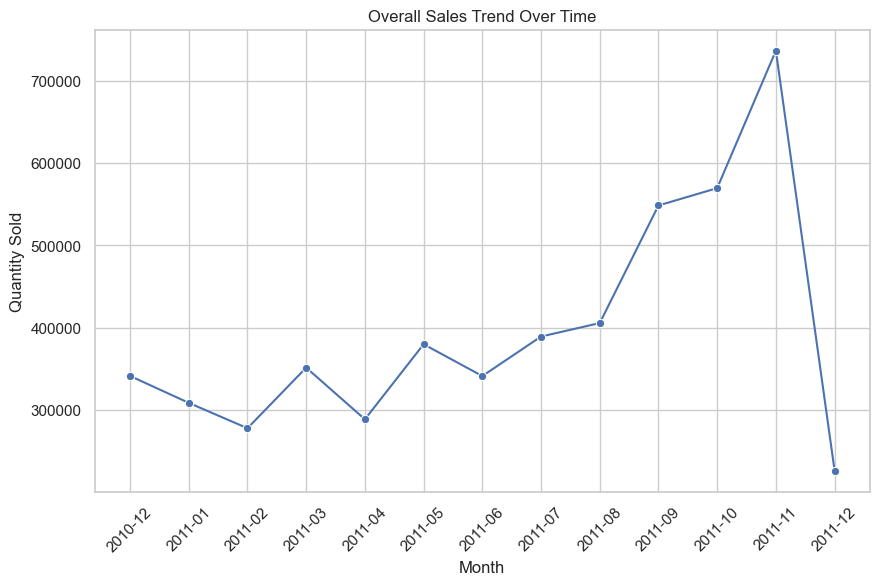

In [34]:
# Again to be safe convert 'InvoiceMonth' to string format
monthly_sales_trend['InvoiceMonth'] = monthly_sales_trend['InvoiceMonth'].astype(str)

# let's  inspect the first few rows to ensure the format is correct
print(monthly_sales_trend['InvoiceMonth'].head())

# Check for any missing or unexpected values in 'InvoiceMonth'
print(monthly_sales_trend[monthly_sales_trend['InvoiceMonth'].isna()])

# Drop rows with missing 'InvoiceMonth' values
monthly_sales_trend.dropna(subset=['InvoiceMonth'], inplace=True)

# Plot the overall sales trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales_trend, x='InvoiceMonth', y='Quantity', marker='o')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


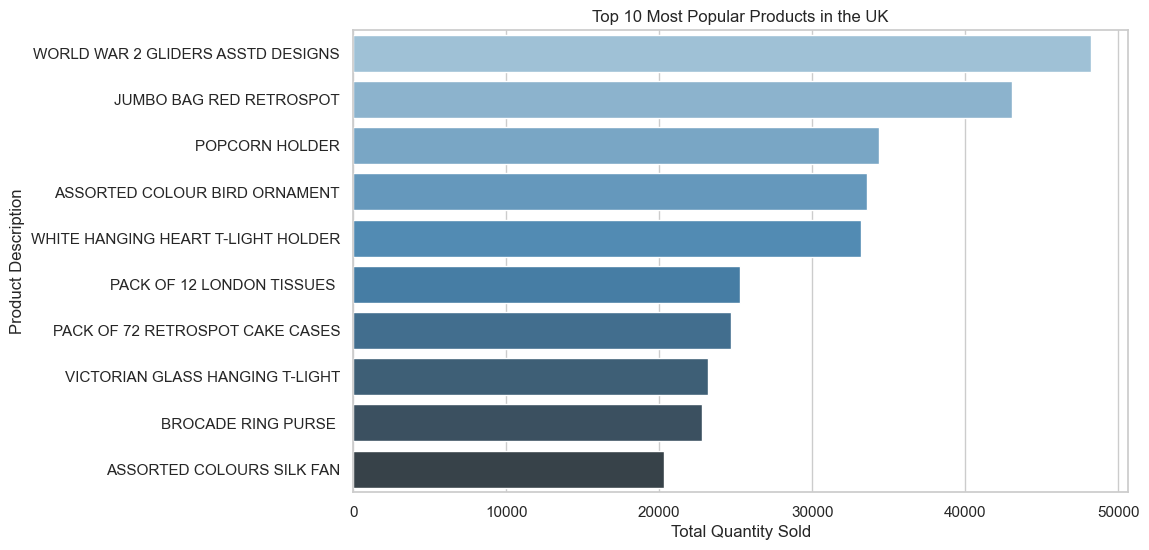

In [26]:
# Calculate total quantity sold per product per country
product_by_country = forehead.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# Sort the products by quantity sold within each country
uk_product_popularity = product_by_country[product_by_country['Country'] == 'United Kingdom']
uk_product_popularity = uk_product_popularity.sort_values(by='Quantity', ascending=False)

# Plot the top 10 most popular products in the UK
plt.figure(figsize=(10, 6))
sns.barplot(data=uk_product_popularity.head(10), x='Quantity', y='Description', palette='Blues_d')
plt.title('Top 10 Most Popular Products in the UK')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()
